<a href="https://colab.research.google.com/github/fatimabalig/codealpha_tasks/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

In [ ]:
# Step 2: Load Dataset
data = pd.read_csv('/content/car data.csv')

In [ ]:
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [ ]:
# Step 3: Data Preprocessing
# Fill missing values (if any), encode categorical features, and scale numerical features
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Step 4: Feature Selection and Engineering
# Creating a new feature 'car_age'
data['car_age'] = 2024 - data['Year']


In [ ]:
# Drop unnecessary or redundant features
data = data.drop(['Year'], axis=1)

In [ ]:
# Step 5: Train-Test Split
X = data.drop('Present_Price', axis=1)  # Assuming 'price' is the target variable
y = data['Present_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Model Training
# Try different models and find the best one
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

In [ ]:
# Dictionary to store the model performances
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = [mae, rmse, r2]
    print(f"{model_name} - MAE: {mae}, RMSE: {rmse}, R2: {r2}")

Linear Regression - MAE: 1.1962431233626387, RMSE: 1.8292239237558467, R2: 0.9336581833860851
Ridge Regression - MAE: 1.6407010201278354, RMSE: 2.3371616904232746, R2: 0.8916993328538743
Lasso Regression - MAE: 1.9580640493090888, RMSE: 3.2106056309902082, R2: 0.795625108174886
Random Forest - MAE: 1.3813762295081962, RMSE: 2.405692069665363, R2: 0.8852550219726213


In [ ]:
# Step 7: Hyperparameter Tuning (example with RandomForest)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [ ]:
# Step 8: Evaluation and Feature Importance
y_pred = best_rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Best Random Forest Model - MAE: {mae}, RMSE: {rmse}, R2: {r2}")

Best Random Forest Model - MAE: 1.355326536352536, RMSE: 2.3267292888123685, R2: 0.8926640195773329


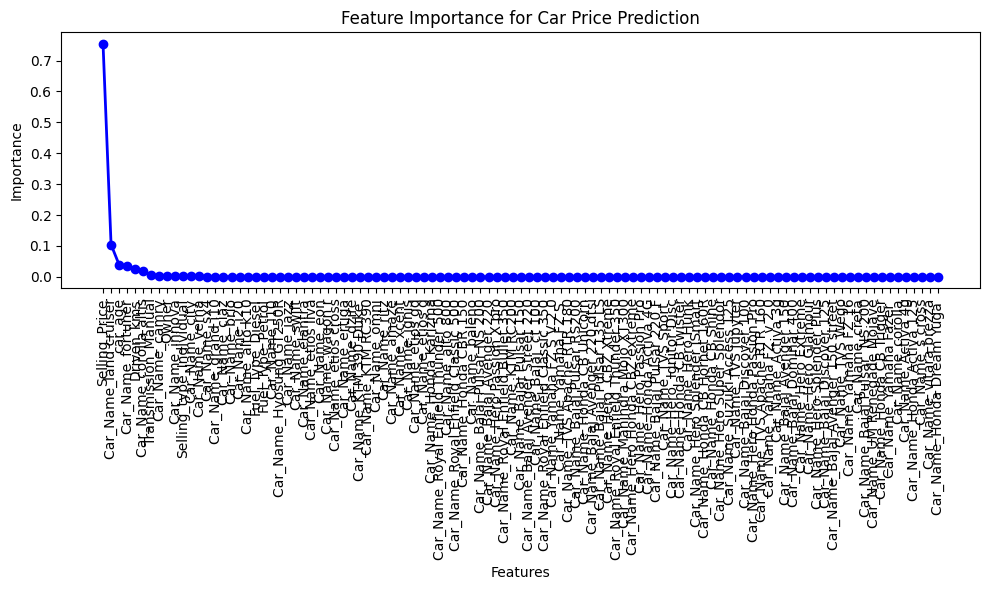

In [ ]:
# Feature Importance Line Chart
importances = best_rf_model.feature_importances_
features = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]  # Sorting in descending order
sorted_features = [features[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sorted_features, sorted_importances, marker='o', color='b', linestyle='-', linewidth=2)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Car Price Prediction')
plt.tight_layout()
plt.show()

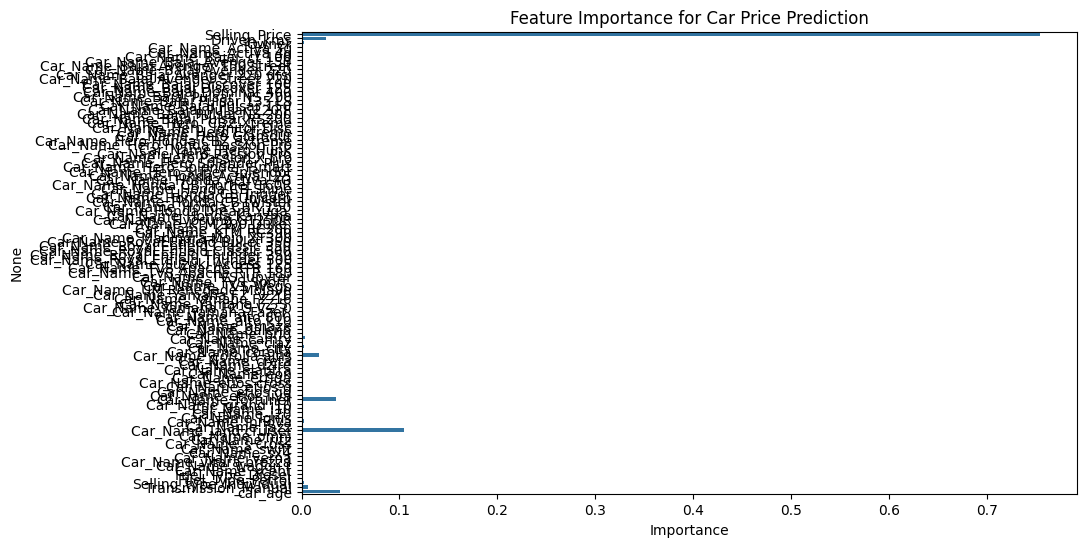

In [ ]:
# Feature Importance Bar Plot
importances = best_rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.xlabel('Importance')
plt.title('Feature Importance for Car Price Prediction')
plt.show()

In [ ]:
# Step 9: Save the Model
joblib.dump(best_rf_model, 'car_price_prediction_model.joblib')

['car_price_prediction_model.joblib']